In [31]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

In [32]:
#load file yang diperlukan
file_json = open ('D:\\Test py\\UAS\\kode_negara_lengkap.json')
file_json = file_json.read()
negara = json.loads(file_json)
negara_dict = pd.DataFrame.from_dict(negara)
df = pd.read_csv('D:\\Test py\\UAS\\produksi_minyak_mentah.csv')
df.loc[(df[['produksi']] != 0).all(axis=1)]
kode = list()

In [33]:
#input-input
input_negara = input('Enter location: ')
input_negara = input_negara.title()
tahun = int(input("Masukkan tahun yang diinginkan: "))
jumlah_negara = int(input("Masukkan jumlah negara: "))

In [34]:
#Soal a
awal = next((x for x in negara if x["name"] == input_negara), None)
print(type(awal))  

for k, v in awal.items():
    if k == 'alpha-3':
        kode.append(v)

kode_string = kode[0]

pilihan = df[(df["kode_negara"] == kode_string)]
pilihan

<class 'dict'>


,kode_negara,tahun,produksi
135,CAN,1971,67007.824
136,CAN,1972,77035.899
137,CAN,1973,90370.215
138,CAN,1974,84632.586
139,CAN,1975,79325.228
140,CAN,1976,72727.056
141,CAN,1977,72847.655
142,CAN,1978,71739.784
143,CAN,1979,79991.586
144,CAN,1980,65540.201


<AxesSubplot:xlabel='tahun'>

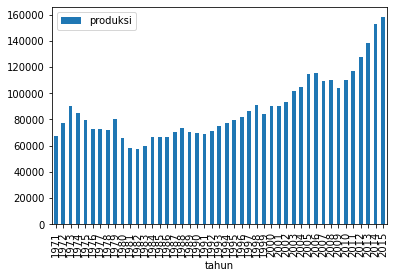

In [35]:
pilihan.plot.bar(x='tahun', y='produksi')

In [36]:
#Soal b
daftar_tahun = df[(df["tahun"]==tahun)]
daftar_tahun = daftar_tahun.sort_values(by='produksi', ascending=False)
jumlah_negara_tot = jumlah_negara + 1
produksi_terbesar_urut = daftar_tahun[1:jumlah_negara_tot]
produksi_terbesar_urut #dataframe urutan produksi negara terbanyak pada tahun tertentu

,kode_negara,tahun,produksi
3743,G20,2000,1828488.378
3788,OECD,2000,893897.287
3088,SAU,2000,410059.696
1379,OEU,2000,321508.155
3043,RUS,2000,312820.807


In [37]:
#Soal c
df['Total'] = df.groupby(['kode_negara'])['produksi'].transform('sum')
new_df = df.drop_duplicates(subset=['kode_negara'])
produksi_terbesar = new_df.sort_values(by='Total', ascending=False)
slice_prod_terbesar = ['kode_negara','tahun','Total']
produksi_terbesar [slice_prod_terbesar]

,kode_negara,tahun,Total
3606,WLD,1971,1.443952e+08
3714,G20,1971,7.329864e+07
3759,OECD,1971,3.595827e+07
3059,SAU,1971,1.771177e+07
1305,USA,1971,1.672414e+07
...,...,...,...
4673,JAM,1971,0.000000e+00
4763,KEN,1971,0.000000e+00
1170,CHE,1971,0.000000e+00
2576,MKD,1990,0.000000e+00


In [38]:
number_of_input = jumlah_negara + 1
produksi_terbesar_urut = produksi_terbesar[1:number_of_input]

<AxesSubplot:xlabel='kode_negara'>

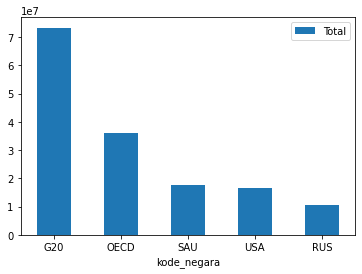

In [39]:
produksi_terbesar_urut.plot.bar(x='kode_negara', y='Total', rot=0)

In [40]:
#Soal d
#bagian 1
dataframe = pd.DataFrame.from_dict(negara)
produksi_terbesar_urut
slice_produksi = ['produksi']
tahun_terbanyak = produksi_terbesar_urut [slice_produksi]
tahun_terbanyak_str = tahun_terbanyak.head(1)['produksi'].values[0]
tahun_terbanyak_str

955412.805

In [41]:
slice_nama_negara = ['kode_negara']
negara_tahun_terbanyak = produksi_terbesar_urut [slice_nama_negara]
negara_tahun_terbanyak_str = negara_tahun_terbanyak.head(1)['kode_negara'].values[0]
print (negara_tahun_terbanyak_str)

G20


In [42]:
slice = ['name','alpha-3','region','sub-region']
list_negara = negara_dict[(negara_dict["name"] == negara_tahun_terbanyak_str)]
list_negara_fix = list_negara [slice]
list_negara_fix ['produksi-terbanyak-tahun ', tahun] = tahun_terbanyak_str

In [43]:
total_prod = produksi_terbesar[(produksi_terbesar["kode_negara"] == kode_string)]
prod_total_str = total_prod.head(1)['Total'].values[0]
list_negara_fix ['total-produksi'] = prod_total_str
list_negara_fix

,name,alpha-3,region,sub-region,"(produksi-terbanyak-tahun , 2000)",total-produksi


In [44]:
#Soal d
#bagian 2
slice = ['name','alpha-3','region','sub-region']
list_negara = negara_dict[(negara_dict["name"] == input_negara)]
list_negara_fix_kecil = list_negara [slice]
tahun_terkecil_str = tahun_terbanyak.tail(1)['tahun'].values[0]
list_negara_fix_kecil ['tahun-produksi-terkecil'] = tahun_terkecil_str

KeyError: 'tahun'

In [ ]:
total_prod = produksi_terbesar[(produksi_terbesar["kode_negara"] == kode_string)]
prod_total_str = total_prod.head(1)['Total'].values[0]
list_negara_fix_kecil ['total-produksi'] = prod_total_str
list_negara_fix_kecil

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_23420/3069929697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_negara_fix_kecil ['total-produksi'] = prod_total_str


,name,alpha-3,region,sub-region,tahun-produksi-terkecil,total-produksi
104,Indonesia,IDN,Asia,South-eastern Asia,2015,2906842.509
